In [95]:
import pandas as pd
from fbprophet import Prophet
from coinpaprika import client as Coinpaprika
import numpy as np

In [96]:
### Get a year historical OHLCV information for a specific coin (BTC)
def load_year(year):
    client = Coinpaprika.Client()
    data = pd.DataFrame(client.candles("btc-bitcoin", start="{}-01-11T00:00:00Z".format(year), 
                                       end = "{}-04-11T00:00:00Z".format(year+1)))
    dates = []
    times = []
    for i in range(len(data["time_close"])):
        d, t = data["time_close"][i].split("T")
        dates.append(d)
        times.append(t)
    
    dates = np.array(dates, dtype = "datetime64" )
    yval = data["close"].values.reshape(-1,1)
    return yval, dates

def prep_transform(data,n_input, n_out):
    x, y = [],[]
    in_start = 0
    for _ in range(len(data)):
        in_end = in_start + n_input
        out_end = n_out + in_end
        if (out_end < len(data)):
            x_inp = data[in_start: in_end].reshape((n_input, 1))
            x.append(x_inp)
            y_inp = data[in_end: out_end, 0]
            y.append(y_inp)
        in_start = in_start + 1 
    return np.array(x), np.array(y)

In [97]:
y , date = load_year(2019)

In [98]:
df_dict = {
    "ds": date,
    "y": y.reshape(len(y))
}
df = pd.DataFrame(df_dict)

In [99]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [100]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
725,2021-01-05
726,2021-01-06
727,2021-01-07
728,2021-01-08
729,2021-01-09


In [101]:
# Python
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
725,2021-01-05,-1480.675293,-13708.927764,9869.404174
726,2021-01-06,-1479.082243,-14229.721065,9931.006787
727,2021-01-07,-1582.084744,-14285.655218,9798.311658
728,2021-01-08,-1518.015919,-14035.656245,9705.630689
729,2021-01-09,-1554.520503,-14387.364939,9972.183591


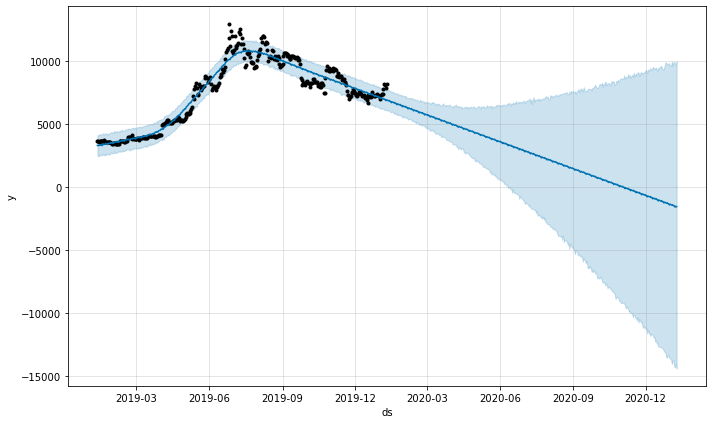

In [102]:
# Python
fig1 = model.plot(forecast)

In [103]:
forecast.to_csv("forcast.csv")

In [61]:
yhat_lower = forecast["yhat_lower"].to_numpy()
yhat_upper = forecast["yhat_upper"].to_numpy()
yhat = forecast["yhat"].to_numpy()

In [86]:
error = ((yhat_upper - yhat_lower)/2)/abs(yhat)*100

In [87]:
max(error)

73766.39236769517

In [88]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=error))
fig.show()

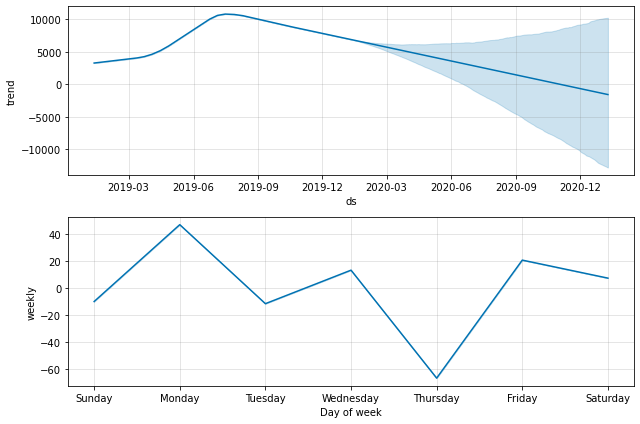

In [40]:
fig2 = model.plot_components(forecast)


In [41]:
forecast = Prophet(interval_width=0.95).fit(df).predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-11,3279.483078,1962.286469,4613.671076,3279.483078,3279.483078,20.660936,20.660936,20.660936,20.660936,20.660936,20.660936,0.0,0.0,0.0,3300.144014
1,2019-01-12,3292.056668,2046.708650,4557.178426,3292.056668,3292.056668,7.339836,7.339836,7.339836,7.339836,7.339836,7.339836,0.0,0.0,0.0,3299.396504
2,2019-01-13,3304.630259,2084.407888,4479.721552,3304.630259,3304.630259,-9.954994,-9.954994,-9.954994,-9.954994,-9.954994,-9.954994,0.0,0.0,0.0,3294.675265
3,2019-01-14,3317.203849,2189.422728,4609.896001,3317.203849,3317.203849,46.866842,46.866842,46.866842,46.866842,46.866842,46.866842,0.0,0.0,0.0,3364.070691
4,2019-01-15,3329.777440,1930.007629,4561.104820,3329.777440,3329.777440,-11.548890,-11.548890,-11.548890,-11.548890,-11.548890,-11.548890,0.0,0.0,0.0,3318.228549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2021-01-05,-1469.126403,-18332.206667,17749.400208,-18532.680820,17366.111712,-11.548890,-11.548890,-11.548890,-11.548890,-11.548890,-11.548890,0.0,0.0,0.0,-1480.675293
726,2021-01-06,-1492.309887,-18590.401624,17448.496979,-18661.069630,17443.500724,13.227643,13.227643,13.227643,13.227643,13.227643,13.227643,0.0,0.0,0.0,-1479.082243
727,2021-01-07,-1515.493371,-19047.861698,17440.459886,-18791.771353,17522.259706,-66.591373,-66.591373,-66.591373,-66.591373,-66.591373,-66.591373,0.0,0.0,0.0,-1582.084744
728,2021-01-08,-1538.676855,-18527.259165,17902.410911,-18922.473076,17603.529836,20.660936,20.660936,20.660936,20.660936,20.660936,20.660936,0.0,0.0,0.0,-1518.015919


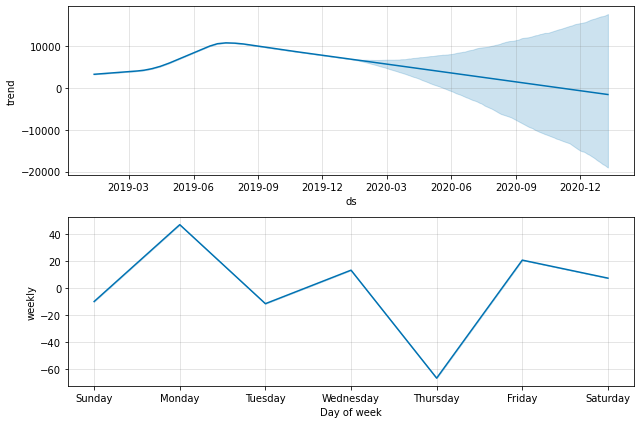

In [43]:
fig = model.plot_components(forecast)

            ds            y   Log_Ret  Volatility
350 2019-12-27  7268.265879  0.005136    0.623777
351 2019-12-28  7337.169290  0.009435    0.623815
352 2019-12-29  7409.336887  0.009788    0.623855
353 2019-12-30  7270.950571 -0.018854    0.624019
354 2019-12-31  7216.095591 -0.007573    0.623344
355 2020-01-01  7220.191982  0.000568    0.622879
356 2020-01-02  6992.200565 -0.032086    0.622002
357 2020-01-03  7315.080128  0.045143    0.623359
358 2020-01-04  7375.768309  0.008262    0.623372
359 2020-01-05  7370.259475 -0.000747    0.623373
360 2020-01-06  7793.858569  0.055883    0.625710
361 2020-01-07  8174.912443  0.047734    0.627147
362 2020-01-08  8058.613079 -0.014329    0.627315
363 2020-01-09  7841.088269 -0.027364    0.627663
364 2020-01-10  8165.200971  0.040504    0.627015


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

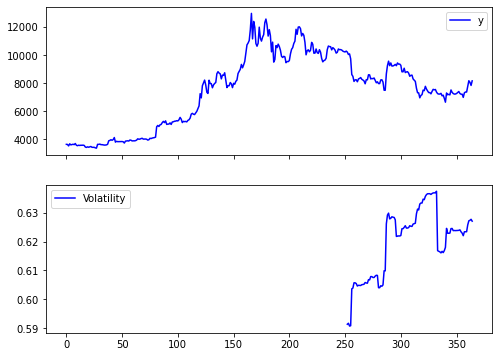

In [94]:
import pandas_datareader.data as web
import yfinance as yf

# Pull NIFTY data from Yahoo finance 
#NIFTY = yf.download('^NSEI',start='2012-6-1', end='2016-6-1')

# # Compute the logarithmic returns using the Closing price 
df['Log_Ret'] = np.log(df['y'] / df['y'].shift(1))

#Compute Volatility using the pandas rolling standard deviation function
df['Volatility'] = df['Log_Ret'].rolling(window=252).std() * np.sqrt(252)
print(df.tail(15))

# # Plot the NIFTY Price series and the Volatility
df[['y', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))
